In [11]:
import sys
sys.path.append("staubli")
import staubli.utils as su
from staubli.stlprocessing import *
import staubli.visualize as sv
import staubli.automation as sa
from staubli.project import StaubliProject
import time


config, printing = sa.load_validate_configs(schemaPath="staubli/", jsonPath="valveTest/")
valve = StlMesh(config["stlPath"])
globalScale = valve.mesh.vertices.copy().flatten()

<IPython.core.display.Javascript object>


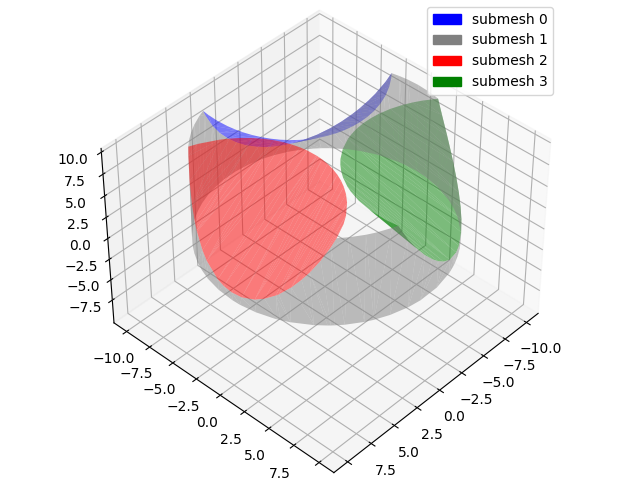

In [12]:
%matplotlib notebook
figure = plt.figure()
axes = mplot3d.Axes3D(figure,auto_add_to_figure=False)
figure.add_axes(axes)
sv.matplot_valve(axes, valve)
axes.auto_scale_xyz(globalScale, globalScale, globalScale)

<IPython.core.display.Javascript object>


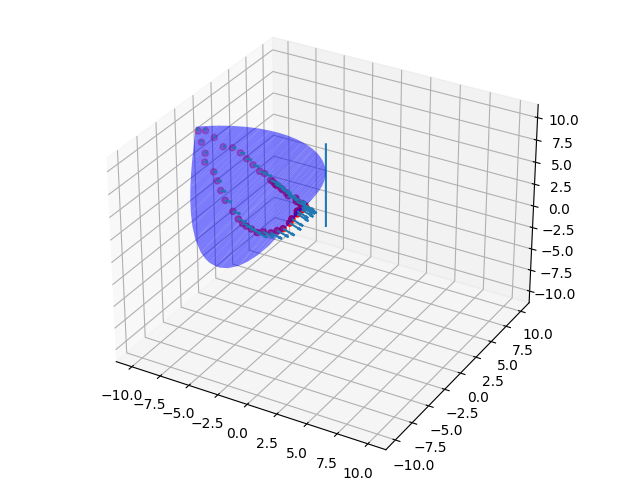

<ipython-input-13-ab00bc7df47f>:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = mplot3d.Axes3D(figure)


In [13]:
%matplotlib notebook
subleaf = valve.submeshes[0]
subleaf.transform_to_original()


figure = plt.figure()
axes = mplot3d.Axes3D(figure)
sv.matplot_mesh(axes, subleaf)
axes.auto_scale_xyz(globalScale, globalScale, globalScale)

<IPython.core.display.Javascript object>


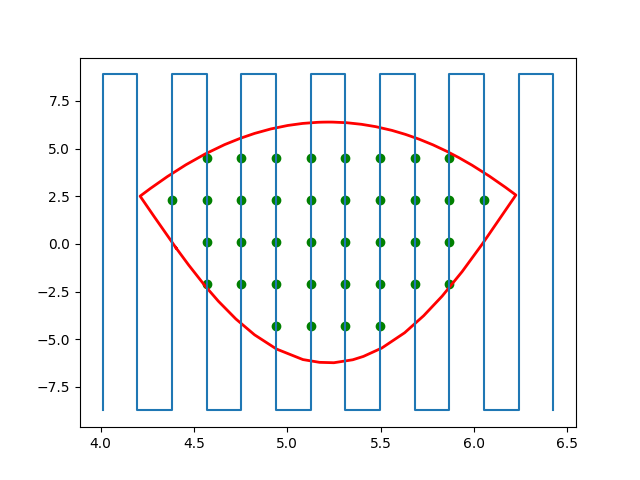

In [14]:
%matplotlib notebook
figure = plt.figure()
axes = figure.add_subplot(1, 1, 1)

pointsConfig = printing["submeshPrinting"][0]["points"]
dy = pointsConfig["distance"]

if subleaf.surfaceForm == SurfaceForm.Flat:
    dx = dy
else:
    dx = dy/subleaf.radius
    
if(pointsConfig["pattern"] == "topDown"):
    grid = su.topDownGrid(subleaf.p_xmin-dx, subleaf.p_ymin-dy,\
                     subleaf.p_xmax+dx, subleaf.p_ymax+dy, dx,dy)
else: 
    grid = su.topDownGrid(subleaf.p_xmin-dx, subleaf.p_ymin-dy,\
                      subleaf.p_xmax+dx, subleaf.p_ymax+dy, dx,dy).T

mask = su.points_in_hull(grid, subleaf.p_hull)

sv.plot_points_hull(axes, subleaf, grid)

In [15]:
start = time.time()

subleaf.transform_to_projection()
subleaf.set_proj_points_normals(grid[mask])

end = time.time()
print(end - start)

0.1129598617553711


<IPython.core.display.Javascript object>


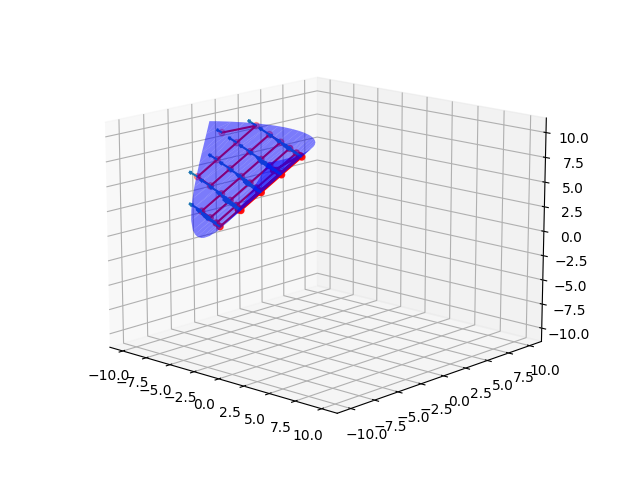

In [16]:
%matplotlib notebook
figure = plt.figure()
axes = mplot3d.Axes3D(figure,auto_add_to_figure=False)
figure.add_axes(axes)
subleaf.transform_to_original()
sv.matplot_mesh(axes, subleaf, True, False, sv.get_color(0))

axes.auto_scale_xyz(globalScale, globalScale, globalScale)

In [17]:
for i in range(len(valve.submeshes)):
    subleaf = valve.submeshes[i]

    pointsConfig = printing["submeshPrinting"][0]["points"]
    dy = pointsConfig["distance"]
    
    if subleaf.surfaceForm == SurfaceForm.Flat:
        dx = dy
    else:
        dx = dy/subleaf.radius
        
    if(pointsConfig["pattern"] == "topDown"):
        grid = su.topDownGrid(subleaf.p_xmin-dx, subleaf.p_ymin-dy,\
                         subleaf.p_xmax+dx, subleaf.p_ymax+dy, dx,dy)
    else: 
        grid = su.topDownGrid(subleaf.p_xmin-dx, subleaf.p_ymin-dy,\
                          subleaf.p_xmax+dx, subleaf.p_ymax+dy, dx,dy).T
    
    mask = su.points_in_hull(grid, subleaf.p_hull)



    start = time.time()

    subleaf.transform_to_projection()
    subleaf.set_proj_points_normals(grid[mask])

    end = time.time()
    print(end - start)

0.11233115196228027
0.9318642616271973
0.09849238395690918
0.08986020088195801


<IPython.core.display.Javascript object>


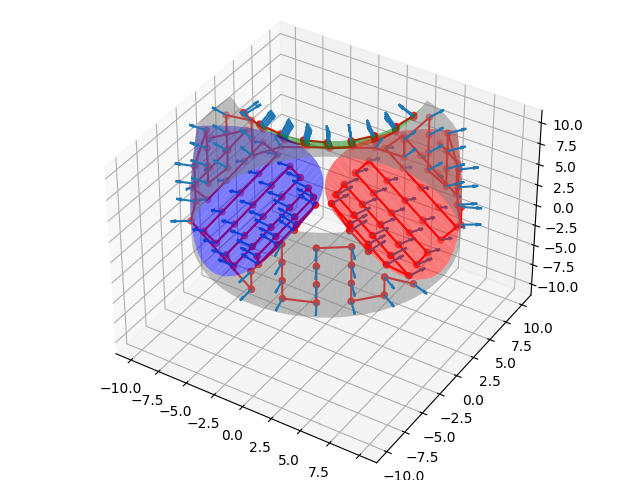

In [18]:
%matplotlib notebook
# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure,auto_add_to_figure=False)
figure.add_axes(axes)

for i in range(len(valve.submeshes)):
    subleaf = valve.submeshes[i]
    subleaf.transform_to_original()
    sv.matplot_mesh(axes, subleaf, True, False, sv.get_color(i))

axes.auto_scale_xyz(globalScale, globalScale, globalScale)